In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
covid_data = pd.read_csv(r'...\Data_Set\covid_19_india.csv')

In [3]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [4]:
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [5]:
covid_data['Deaths'].value_counts()

0.0        1718
1.0         527
2.0         417
3.0         195
4.0         161
           ... 
49759.0       1
54181.0       1
19852.0       1
4462.0        1
7129.0        1
Name: Deaths, Length: 5026, dtype: int64

In [6]:
covid_data.isna().sum()

Sno                         28
Date                        28
Time                        28
State/UnionTerritory        28
ConfirmedIndianNational     28
ConfirmedForeignNational    28
Cured                       28
Deaths                      28
Confirmed                   28
dtype: int64

In [7]:
covid_data.corr()

,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.393719,0.269649,0.384336
Cured,0.393719,1.000000,0.906224,0.995953
Deaths,0.269649,0.906224,1.000000,0.907471
Confirmed,0.384336,0.995953,0.907471,1.000000


In [8]:
covid_data.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [9]:
covid_data.sort_index()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
15109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
death_state = covid_data[covid_data['Deaths']>0][['State/UnionTerritory','Deaths']].groupby('State/UnionTerritory').sum()

<AxesSubplot:ylabel='State/UnionTerritory'>

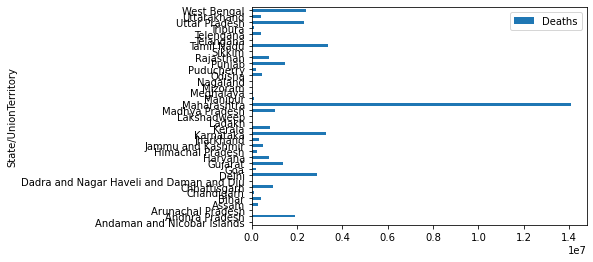

In [11]:
death_state.plot.barh()

<AxesSubplot:ylabel='State/UnionTerritory'>

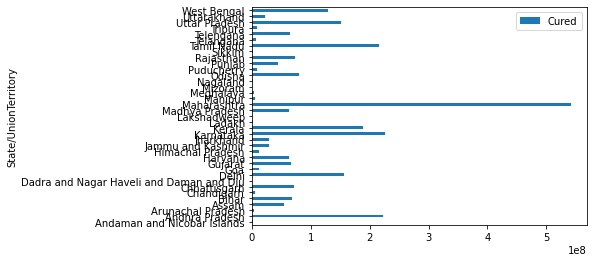

In [12]:
covid_data[covid_data['Cured']>0][['State/UnionTerritory','Cured']].groupby('State/UnionTerritory').sum().plot.barh()

In [13]:
covid_data['Cured'].max()

4927480.0

In [14]:
covid_data['Cured'].min()

0.0

In [15]:
covid_data['Cured'].mean()

174793.6920986345

In [17]:
covid_data['Cured'].median()

19647.0

In [18]:
covid_data[covid_data['Cured']>0]['Cured'].mode()[0]

1.0

In [19]:
covid_data['Cured_Bins']=pd.cut(covid_data['Cured'],bins=[-0.0001,5000,10000,25000,50000],labels=['negligible','low','moderate','high'])

In [20]:
covid_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Cured_Bins
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0,negligible
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0,negligible
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0,negligible
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0,negligible
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0,negligible
...,...,...,...,...,...,...,...,...,...,...
15109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
covid_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Cured_Bins
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0,negligible
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0,negligible
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0,negligible
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0,negligible
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0,negligible
...,...,...,...,...,...,...,...,...,...,...
15109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
covid_data.dropna()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Cured_Bins
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0,negligible
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0,negligible
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0,negligible
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0,negligible
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0,negligible
...,...,...,...,...,...,...,...,...,...,...
15072,15073.0,2021-05-19,8:00 AM,Meghalaya,-,-,19185.0,355.0,24872.0,moderate
15073,15074.0,2021-05-19,8:00 AM,Mizoram,-,-,7094.0,29.0,9252.0,low
15074,15075.0,2021-05-19,8:00 AM,Nagaland,-,-,14079.0,228.0,18714.0,moderate
15079,15080.0,2021-05-19,8:00 AM,Sikkim,-,-,8427.0,212.0,11689.0,low


<AxesSubplot:ylabel='Cured_Bins'>

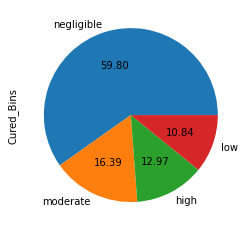

In [23]:
covid_data['Cured_Bins'].value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:>

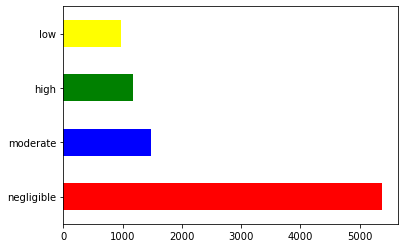

In [37]:
covid_data['Cured_Bins'].value_counts().plot(kind='barh',color=['red','blue','green','yellow'])